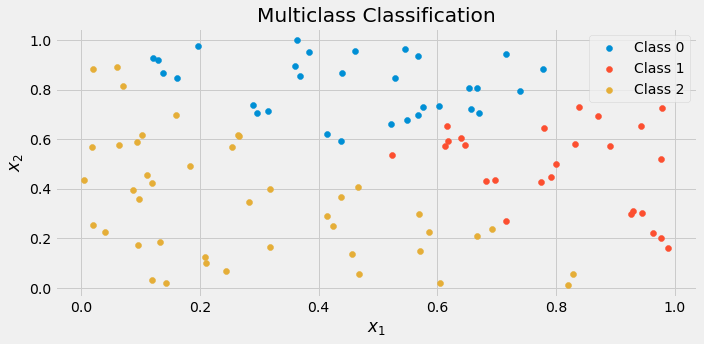

In [1]:
import jax.numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Data
x1 = np.array([0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ,
               0.64589411, 0.43758721, 0.891773  , 0.96366276, 0.38344152,
               0.79172504, 0.52889492, 0.56804456, 0.92559664, 0.07103606,
               0.0871293 , 0.0202184 , 0.83261985, 0.77815675, 0.87001215,
               0.97861834, 0.79915856, 0.46147936, 0.78052918, 0.11827443,
               0.63992102, 0.14335329, 0.94466892, 0.52184832, 0.41466194,
               0.26455561, 0.77423369, 0.45615033, 0.56843395, 0.0187898 ,
               0.6176355 , 0.61209572, 0.616934  , 0.94374808, 0.6818203 ,
               0.3595079 , 0.43703195, 0.6976312 , 0.06022547, 0.66676672,
               0.67063787, 0.21038256, 0.1289263 , 0.31542835, 0.36371077,
               0.57019677, 0.43860151, 0.98837384, 0.10204481, 0.20887676,
               0.16130952, 0.65310833, 0.2532916 , 0.46631077, 0.24442559,
               0.15896958, 0.11037514, 0.65632959, 0.13818295, 0.19658236,
               0.36872517, 0.82099323, 0.09710128, 0.83794491, 0.09609841,
               0.97645947, 0.4686512 , 0.97676109, 0.60484552, 0.73926358,
               0.03918779, 0.28280696, 0.12019656, 0.2961402 , 0.11872772,
               0.31798318, 0.41426299, 0.0641475 , 0.69247212, 0.56660145,
               0.26538949, 0.52324805, 0.09394051, 0.5759465 , 0.9292962 ,
               0.31856895, 0.66741038, 0.13179786, 0.7163272 , 0.28940609,
               0.18319136, 0.58651293, 0.02010755, 0.82894003, 0.00469548])


x2 = np.array([0.67781654, 0.27000797, 0.73519402, 0.96218855, 0.24875314,
               0.57615733, 0.59204193, 0.57225191, 0.22308163, 0.95274901,
               0.44712538, 0.84640867, 0.69947928, 0.29743695, 0.81379782,
               0.39650574, 0.8811032 , 0.58127287, 0.88173536, 0.69253159,
               0.72525428, 0.50132438, 0.95608363, 0.6439902 , 0.42385505,
               0.60639321, 0.0191932 , 0.30157482, 0.66017354, 0.29007761,
               0.61801543, 0.4287687 , 0.13547406, 0.29828233, 0.56996491,
               0.59087276, 0.57432525, 0.65320082, 0.65210327, 0.43141844,
               0.8965466 , 0.36756187, 0.43586493, 0.89192336, 0.80619399,
               0.70388858, 0.10022689, 0.91948261, 0.7142413 , 0.99884701,
               0.1494483 , 0.86812606, 0.16249293, 0.61555956, 0.12381998,
               0.84800823, 0.80731896, 0.56910074, 0.4071833 , 0.069167  ,
               0.69742877, 0.45354268, 0.7220556 , 0.86638233, 0.97552151,
               0.85580334, 0.01171408, 0.35997806, 0.72999056, 0.17162968,
               0.52103661, 0.05433799, 0.19999652, 0.01852179, 0.7936977 ,
               0.22392469, 0.34535168, 0.92808129, 0.7044144 , 0.03183893,
               0.16469416, 0.6214784 , 0.57722859, 0.23789282, 0.934214  ,
               0.61396596, 0.5356328 , 0.58990998, 0.73012203, 0.311945  ,
               0.39822106, 0.20984375, 0.18619301, 0.94437239, 0.7395508 ,
               0.49045881, 0.22741463, 0.25435648, 0.05802916, 0.43441663])


y = np.array([0., 1., 0., 0., 2., 1., 0., 1., 1., 0., 1., 0., 0., 1., 2., 2., 2.,
              1., 0., 1., 1., 1., 0., 1., 2., 1., 2., 1., 0., 2., 2., 1., 2., 2.,
              2., 1., 1., 1., 1., 1., 0., 2., 1., 2., 0., 0., 2., 0., 0., 0., 2.,
              0., 1., 2., 2., 0., 0., 2., 2., 2., 2., 2., 0., 0., 0., 0., 2., 2.,
              1., 2., 1., 2., 1., 2., 0., 2., 2., 0., 0., 2., 2., 0., 2., 2., 0.,
              2., 1., 2., 0., 1., 2., 2., 2., 0., 0., 2., 2., 2., 2., 2.])

X = np.column_stack([np.ones_like(x1), x1, x2])


plt.figure(figsize=[10, 5])
plt.scatter(x1[y==0], x2[y==0])
plt.scatter(x1[y==1], x2[y==1])
plt.scatter(x1[y==2], x2[y==2])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(['Class 0', 'Class 1', 'Class 2'])
plt.title('Multiclass Classification')
plt.tight_layout()

In [2]:
import jax

def p(Θ):
    return jax.nn.sigmoid(X @ Θ)

def L(Θ, y):
    from jax.scipy.special import xlogy
    return - (xlogy(y, p(Θ)) + xlogy(1 - y, 1 - p(Θ))).mean()


Θ0 = np.zeros(3)
Θ1 = np.zeros(3)
Θ2 = np.zeros(3)

y0 = np.where(y == 0, 0, 1)
y1 = np.where(y == 1, 0, 1)
y2 = np.where(y == 2, 0, 1)

@jax.jit
def update(Θ, y):
    grads = jax.grad(L)(Θ, y)
    α = 1.
    Θ = Θ - α * grads
    return Θ

In [3]:
Θ0, Θ1, Θ2, y1, y2

(DeviceArray([0., 0., 0.], dtype=float32),
 DeviceArray([0., 0., 0.], dtype=float32),
 DeviceArray([0., 0., 0.], dtype=float32),
 DeviceArray([1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
              0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
              1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
              1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
              1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],            dtype=int32, weak_type=True),
 DeviceArray([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
              1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
              1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
              0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
              0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],            dtype=int32, weak_type=True))

In [4]:
# Training the 3 models
for iteration in range(100000):
    Θ0 = update(Θ0, y0)
    Θ1 = update(Θ1, y1)
    Θ2 = update(Θ2, y2)

In [5]:
Θ0, Θ1, Θ2 

(DeviceArray([ 11.100699 ,  -1.0790362, -14.910802 ], dtype=float32),
 DeviceArray([  8.929998, -12.492737,  -0.205839], dtype=float32),
 DeviceArray([-50.64379 ,  53.23983 ,  52.298454], dtype=float32))

In [13]:
# Evaluate accuracy (on the training set)
P = np.column_stack([p(Θ0), p(Θ1), p(Θ2)])
prediction = np.argmin(P, axis=1) #回傳０１２哪個最小，axis = 1 是指一次一列

accuracy = (prediction == y).mean()
print("Accuracy is "+str(accuracy*100)+"%.")
print(P)

Accuracy is 97.99999%.
[[5.99101305e-01 8.73723984e-01 9.99999166e-01]
 [9.98172402e-01 4.84941363e-01 8.25457573e-01]
 [3.74716133e-01 7.77040601e-01 1.00000000e+00]
 [2.11600717e-02 8.72679412e-01 1.00000000e+00]
 [9.99027252e-01 9.73043025e-01 2.82644180e-07]
 [8.59698534e-01 6.77524328e-01 9.99999046e-01]
 [8.58234942e-01 9.65824425e-01 9.73818064e-01]
 [8.32814753e-01 8.87916833e-02 1.00000000e+00]
 [9.98812318e-01 4.09062654e-02 9.99995589e-01]
 [2.87680700e-02 9.80991006e-01 1.00000000e+00]
 [9.72864509e-01 2.58678198e-01 9.99999642e-01]
 [1.10010944e-01 8.95521879e-01 1.00000000e+00]
 [5.14486372e-01 8.44169855e-01 9.99999881e-01]
 [9.96553421e-01 6.33009821e-02 9.99999285e-01]
 [2.47809485e-01 9.99619961e-01 1.33674564e-02]
 [9.93906796e-01 9.99573648e-01 1.06186848e-11]
 [1.13138892e-01 9.99795735e-01 2.96834912e-02]
 [8.22740853e-01 1.69193923e-01 1.00000000e+00]
 [5.28328829e-02 2.74321824e-01 1.00000000e+00]
 [4.59022880e-01 1.10919341e-01 1.00000000e+00]
 [3.16611469e-01 

In [7]:
P[0:5]

DeviceArray([[5.9910131e-01, 8.7372398e-01, 9.9999917e-01],
             [9.9817240e-01, 4.8494136e-01, 8.2545757e-01],
             [3.7471613e-01, 7.7704060e-01, 1.0000000e+00],
             [2.1160072e-02, 8.7267941e-01, 1.0000000e+00],
             [9.9902725e-01, 9.7304302e-01, 2.8264418e-07]],            dtype=float32)

In [8]:
prediction[0:5]

DeviceArray([0, 1, 0, 0, 2], dtype=int32)

In [9]:
print(list(prediction))

[DeviceArray(0, dtype=int32), DeviceArray(1, dtype=int32), DeviceArray(0, dtype=int32), DeviceArray(0, dtype=int32), DeviceArray(2, dtype=int32), DeviceArray(1, dtype=int32), DeviceArray(0, dtype=int32), DeviceArray(1, dtype=int32), DeviceArray(1, dtype=int32), DeviceArray(0, dtype=int32), DeviceArray(1, dtype=int32), DeviceArray(0, dtype=int32), DeviceArray(0, dtype=int32), DeviceArray(1, dtype=int32), DeviceArray(2, dtype=int32), DeviceArray(2, dtype=int32), DeviceArray(2, dtype=int32), DeviceArray(1, dtype=int32), DeviceArray(0, dtype=int32), DeviceArray(1, dtype=int32), DeviceArray(1, dtype=int32), DeviceArray(1, dtype=int32), DeviceArray(0, dtype=int32), DeviceArray(1, dtype=int32), DeviceArray(2, dtype=int32), DeviceArray(1, dtype=int32), DeviceArray(2, dtype=int32), DeviceArray(1, dtype=int32), DeviceArray(0, dtype=int32), DeviceArray(2, dtype=int32), DeviceArray(2, dtype=int32), DeviceArray(1, dtype=int32), DeviceArray(2, dtype=int32), DeviceArray(2, dtype=int32), DeviceArray(2

In [10]:
print(list(map(lambda x:int(x), y)))

[0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 1, 0, 0, 1, 2, 2, 2, 1, 0, 1, 1, 1, 0, 1, 2, 1, 2, 1, 0, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 0, 0, 2, 0, 0, 0, 2, 0, 1, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 1, 2, 1, 2, 1, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 1, 2, 0, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2]


In [11]:
for i in range(len(prediction)):
    if prediction[i] != int(y[i]):
        print(i,prediction[i], int(y[i]))

37 0 1
43 0 2


In [12]:
len(prediction)

100